# Preface

In this notebook, we will explore the dataset collected from the background survey using `pandas` and `seaborn`. You can install these packages by issuing
```
$pip install pandas seaborn
```
For in-depth guide to these libraries please refer to their respective online documentation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

# Import Dataset

This is the dataset collected from the background survey on `Luminus`. We can work with the excel files directly using the `pandas` library. If you see error with missing dependency on `xlrd` (for dealing with excel files), install it with the following
```
$pip install xlrd
```

In [5]:
dataset = pd.read_excel('./data/Background Survey-1597550575029.xlsx', skiprows=1)
dataset.head()

,Student Name,Start Time,Submit Time,Status,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q7.1,Q7.2,Q7.3,Q7.4,Q8
0,Anonymous 1,2020-08-15 08:51:43.583,2020-08-15 08:52:41.903,Submitted,Masters,Data Science and Analytics,3,4,True,True,NaN,E-commerce,Quantitative finance,NaN,Natual Language Processing,NaN
1,Anonymous 2,2020-08-11 12:07:35.283,2020-08-14 21:30:34.183,Submitted,Masters,Data Science and Analytics,4,2,False,False,NaN,E-commerce,Quantitative finance,NaN,NaN,I want to learn more about machine learning.
2,Anonymous 3,2020-08-12 21:26:24.460,2020-08-12 21:45:13.673,Submitted,Masters,Mechanical Engineering (Aeronautical specializ...,3,4,False,True,Computer vision and image processing,NaN,NaN,Engineering and sciences,NaN,To learn about the inner workings of the machi...
3,Anonymous 4,2020-08-12 17:33:21.997,2020-08-12 17:35:52.290,Submitted,Masters,Data Science and Analytics,3,5,True,True,Computer vision and image processing,NaN,NaN,NaN,NaN,NaN
4,Anonymous 5,2020-08-12 12:06:37.847,2020-08-12 12:17:50.793,Submitted,Masters,Data Science and Analytics,1,3,True,True,NaN,E-commerce,NaN,NaN,NaN,Looking forward to learn more machine learning...


Let's rename some of the columns

In [6]:
dataset = dataset.rename(
    columns={
        'Q1': 'Degree',
        'Q2': 'Major',
        'Q3': 'Math Background',
        'Q4': 'Python Familiarity',
        'Q5': 'Used ML?',
        'Q6': 'Introductory Class?',
        'Q8': 'Essay'
    })


# Q1

**What degree program are you in? If working, please also state the field of work under the "Others" option.**

This is an example of *nominal* data.

In [7]:
degree_names = dataset['Degree'].fillna('Others')

In [8]:
degree_names

0                    Masters
1                    Masters
2                    Masters
3                    Masters
4                    Masters
               ...          
95        Teaching Assistant
96                        TA
97    Internship in Research
98                   Masters
99          Lifelong learner
Name: Degree, Length: 100, dtype: object

This is rather messy. Let's write a replacement rule to visualize data more easily.

In [9]:
def replacement_rule(name):
    if 'lifelong' in name.lower() or 'l3' in name.lower():
        return 'L3 Program'
    elif 'master' in name.lower():
        return 'Masters'
    elif 'phd' in name.lower():
        return 'PhD'
    else:
        return 'Others'

In [10]:
degree_names = degree_names.apply(replacement_rule)
dataset['Degree'] = degree_names

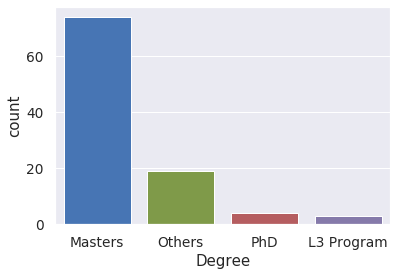

In [11]:
sns.countplot(x=degree_names)

# Q2

**What is/was your major?**

This is another example of *nominal* data.

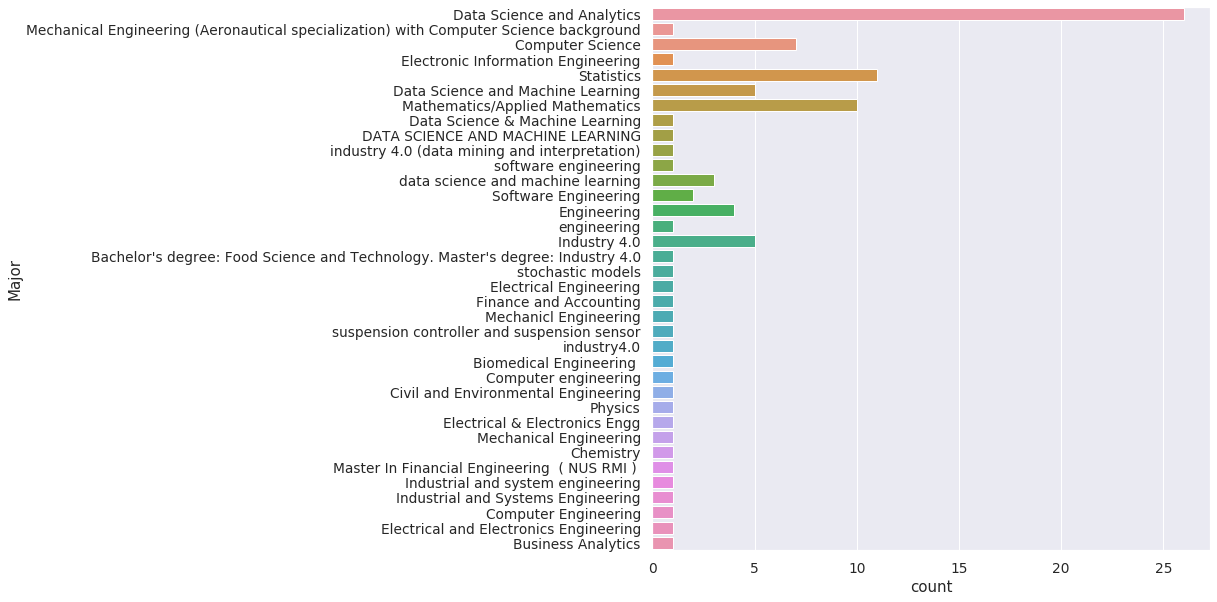

In [12]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(y='Major', data=dataset, orient='v')

**Exercise**

Write a replacement function to visualize major distribution.

# Q3 and Q4

**Mathematics Background and Python Familiarity. There are examples of *ordinal data*.**

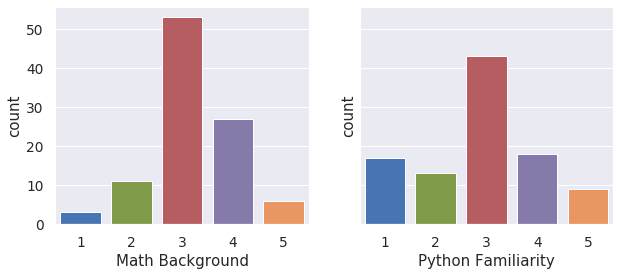

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.countplot(x='Math Background', data=dataset, ax=ax[0])
sns.countplot(x='Python Familiarity', data=dataset, ax=ax[1])

To visualize correlation with major, we coarsen the major classification (this choice is arbitrary except to make numbers relatively similar from the 2 classes)

In [14]:
dataset.Major.unique()

array(['Data Science and Analytics',
       'Mechanical Engineering (Aeronautical specialization) with Computer Science background',
       'Computer Science', 'Electronic Information Engineering',
       'Statistics', 'Data Science and Machine Learning',
       'Mathematics/Applied Mathematics',
       'Data Science & Machine Learning',
       'DATA SCIENCE AND MACHINE LEARNING',
       'industry 4.0 (data mining and interpretation)',
       'software engineering', 'data science and machine learning',
       'Software Engineering', 'Engineering', 'engineering',
       'Industry 4.0',
       "Bachelor's degree: Food Science and Technology. Master's degree: Industry 4.0",
       'stochastic models', 'Electrical Engineering',
       'Finance and Accounting', 'Mechanicl Engineering',
       'suspension controller and suspension sensor', 'industry4.0',
       'Biomedical Engineering ', 'Computer engineering',
       'Civil and Environmental Engineering', 'Physics',
       'Electrical & Ele

In [15]:
dataset['Major (Combined)'] = [
    'Math/Stats/DSA/CS' if ('Math' in m or 'Stat' in m or 'Data Science' in m or 'Computer' in m) else 'Others'
    for m in dataset['Major']
]

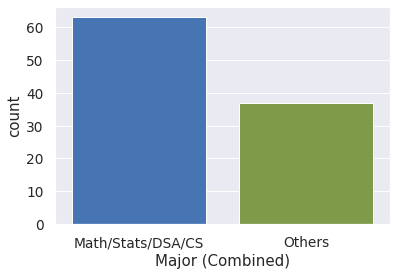

In [16]:
sns.countplot(x='Major (Combined)', data=dataset)

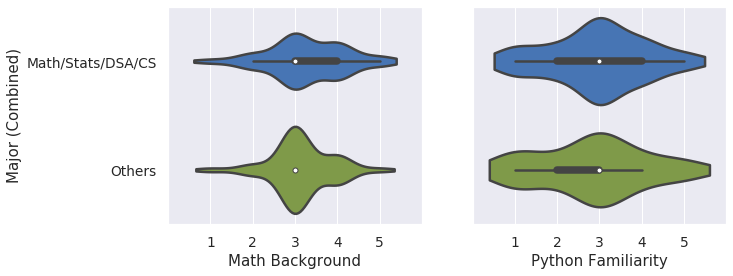

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
# sns.stripplot(y='Major (Combined)', x='Math Background', data=dataset, orient='h', s=7.5, alpha=0.5, ax=ax[0])
# sns.stripplot(y='Major (Combined)', x='Python Familiarity', data=dataset, orient='h', s=7.5, alpha=0.5, ax=ax[1])

sns.violinplot(y='Major (Combined)', x='Math Background', data=dataset, orient='h', cut=1, ax=ax[0])
sns.violinplot(y='Major (Combined)', x='Python Familiarity', data=dataset, orient='h', cut=1, ax=ax[1])

ax[1].set_ylabel('')
for a in ax:
    a.set_xlim(0, 6)
    a.set_xticks(range(1, 6))

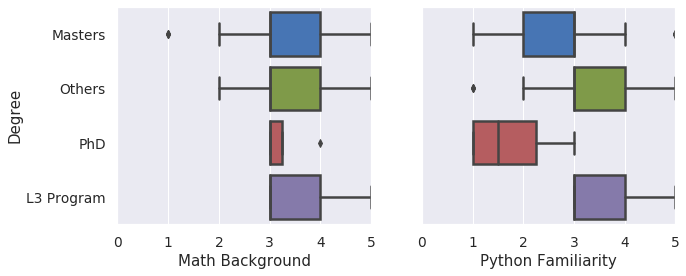

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

sns.boxplot(y='Degree', x='Math Background', data=dataset, orient='h', ax=ax[0])
sns.boxplot(y='Degree', x='Python Familiarity', data=dataset, orient='h', ax=ax[1])

ax[1].set_ylabel('')
for a in ax:
    a.set_xlim(0, 5)

Are there any (linear) correlations? Lets check...

(0, 5)

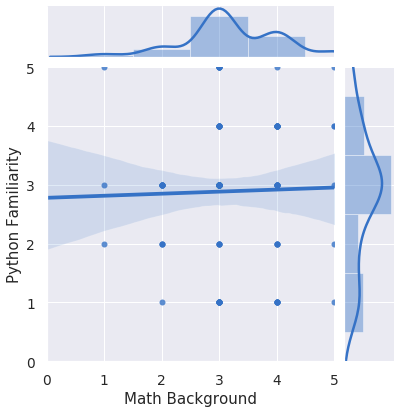

In [19]:
fg = sns.jointplot(
    x='Math Background',
    y='Python Familiarity',
    data=dataset,
    kind='reg',
    marginal_kws=dict(bins=np.arange(5)+0.5),
)
plt.xlim(0, 5)
plt.ylim(0, 5)

In [20]:
dataset.filter(like='?').fillna(False).corr()

,Used ML?,Introductory Class?
Used ML?,1.000000,0.426415
Introductory Class?,0.426415,1.000000


# Q5 and Q6

**Mathematical background and python familiarity**

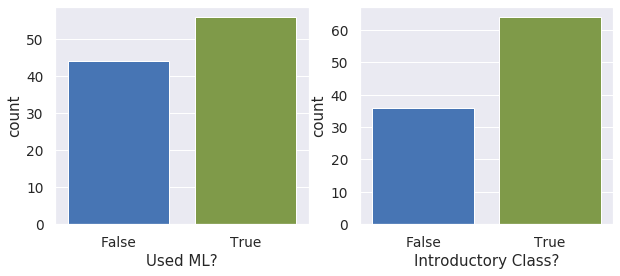

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='Used ML?', data=dataset.fillna(False), ax=ax[0])
sns.countplot(x='Introductory Class?', data=dataset.fillna(False), ax=ax[1])

# Q7
What are your favourite machine learning application domains? If you don't have one, what application areas of machine learning do you look forward to learning?

In [22]:
dataset_Q7 = dataset.filter(like='Q7')

In [23]:
applications = dataset_Q7.values.tolist()  # extract values
applications = [item for sublist in applications for item in sublist]  # flatten list
applications = [a for a in applications if type(a) is str]  # remove nan

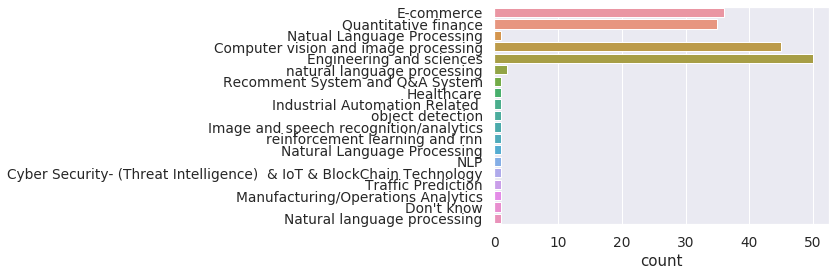

In [24]:
sns.countplot(y=applications, orient='v')

# Q8

Overall, briefly elaborate why you signed up for this class, and what are you looking forward to learning from this class.

In [25]:
[print('{} \n\n'.format(s)) for s in dataset['Essay'].dropna()];

I want to learn more about machine learning. 


To learn about the inner workings of the machine learning algorithms. They are libraries and mathematical models implemented in tensorflow for users. But they are black box to me. Without knowing them from ground up, it is hard to troubleshoot when problems arise or it will be difficult to implement an efficient machine learning system. The main objectives for taking this course is mainly to address the aforementioned lack of understanding of the theoretical foundations of the algorithms. Hopefully after this class, I will be able to understand the different types of deep learning, the popular algorithms associated to them, their mathematical formulations, applications as well as their limitations. My company I am working at specializes in the maintenance, repair and overhaul of aircraft structure. Now they are trying to implement machine vision to identify damages as well as to use deep learning to classify different types of damages on 

Finally, let us visualize theis text data using [`wordcloud`](https://github.com/amueller/word_cloud). Install from command line
```
$pip install wordcloud
```

For more on `wordcloud`, see this [tutorial](https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html).

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [29]:
def show_wordcloud(text):
    """
    Show word cloud of `text`
    """
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=50, 
        scale=3,
    ).generate(str(text))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud, interpolation='bilinear')

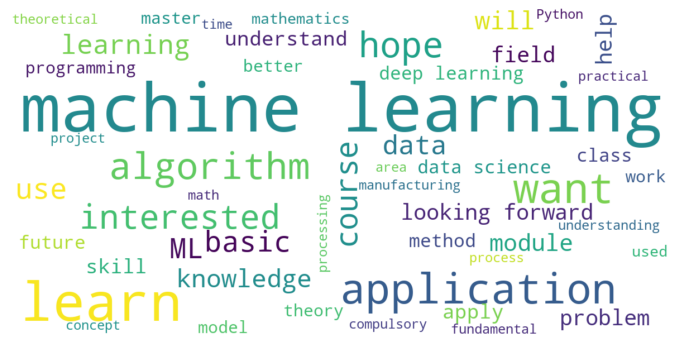

In [30]:
text = dataset['Essay'].dropna().str.cat()
show_wordcloud(text)